In [1]:
import ptracer as pt
import numpy as np
from importlib import reload
from forces import ray_tracer as rtf
from tqdm.notebook import tqdm
from random import random

%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
reload(pt)

<module 'ptracer' from '/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/ptracer.py'>

In [ ]:
pos = np.array([-1e-6, 0, 100e-6])
m = pt.MeshTO(pos, "symmetric_rotated.obj", 5e-6, n_in=1.52)
m2 = pt.Sphere(pos, 5e-6, n_in=1.52)
rf = pt.HexagonalGaussianRF([0,0,0], [0,0,1], 3.39728e-6, 300e-3, 100, 532, pos+[0,0,-7e-6], 5e-6)
s = pt.Scene(rf, [m])
s.run(limit=100)
s.propagate(1e-6)
print(s.momentum)

In [21]:
np.sum(s.r_dirs, axis=0)

array([6.47948734e+00, 9.85320845e-03, 1.27701771e+01])

<IPython.core.display.Javascript object>


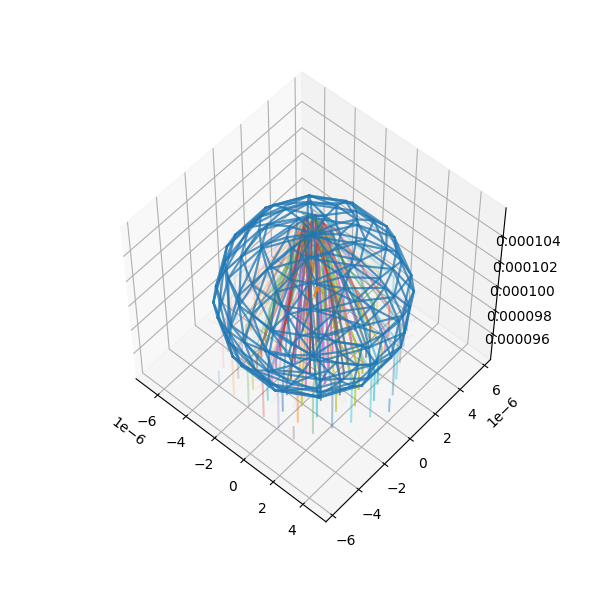

In [22]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
s.plot(ax, m_quiver=True, m_quiver_kwargs={"zorder":10, "color": "tab:orange"})

In [79]:
def rangle():
    return 2*np.pi*random()

In [27]:
moms = []
poss = []
intensity = []
xs = np.linspace(-2e-6, 2e-6, 11)
ys = np.linspace(-2e-6, 2e-6, 11)
for x in tqdm(xs):
    intensity.append([])
    for y in ys:
        pos = np.array([x, y, 655e-6])
        poss.append(pos)
        m = pt.MeshTO(pos, "symmetric_rotated.obj", 5e-6, n_in=1.52)
        m2 = pt.Sphere(pos, 5e-6, n_in=1.52)
        rf = pt.HexagonalGaussianRF([0,0,0], [0,0,1], 3.39728e-6, 300e-3, 301, 532, pos+[0,0,-5.1e-6], 5e-6)
        intensity[-1].append(np.sum(rf.weights) * 6.62607004e-25 * 299792458 / 532)
        s = pt.Scene(rf, [m])
        s.run(limit=5)
        moms.append(s.momentum)
#         print(np.sum(s.r_dirs, axis=0))
#         print(s.momentum)
#         print(moms)
#         print("-"*15)
moms = np.array(moms)
poss = np.array(poss)

<IPython.core.display.Javascript object>


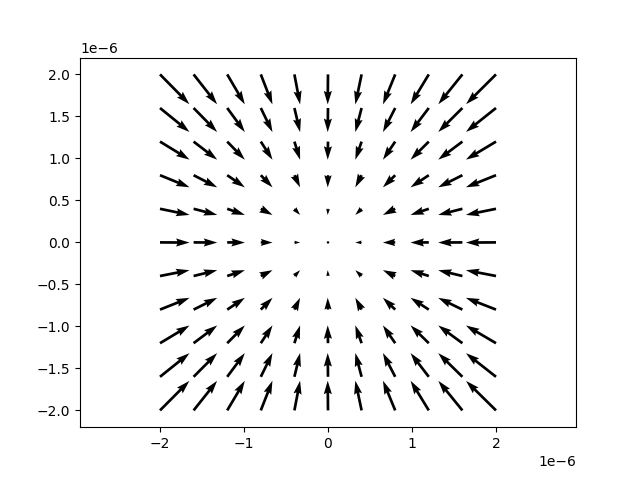

(-2.2e-06, 2.2e-06, -2.2e-06, 2.2e-06)

In [28]:
fig, ax = plt.subplots()
xx, yy = np.meshgrid(xs, ys)
ax.quiver(poss[:,0], poss[:,1], moms[:,0], moms[:,1])
ax.axis("equal")

<IPython.core.display.Javascript object>


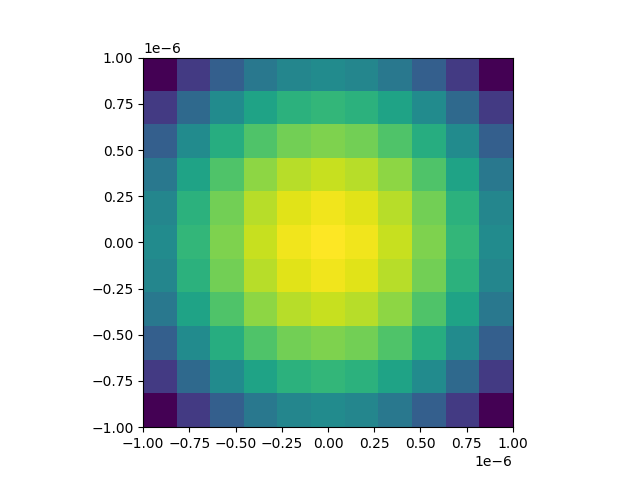

In [135]:
fig, ax = plt.subplots()
ax.imshow(intensity, extent=(-1e-6, 1e-6, -1e-6, 1e-6))